In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ivim_tensor import IvimTensorModel

In [3]:
from dipy.core.gradients import gradient_table

In [4]:
gtab = gradient_table('./data/DWI_IVIM6.bval', './data/DWI_IVIM6.bvec', b0_threshold=0)

In [5]:
from dipy.sims.voxel import multi_tensor

$\frac{S}{S0} = \beta e^{-b \theta^t Q \theta} + (1-\beta) e^{-b \theta^t Q^* \theta}$

In [6]:
mevals = np.array([[0.001, 0.0005, 0.0005], 
                   [0.1, 0.01, 0.01]])

angles = [(90, 0), (90, 0)]

In [7]:
perfusion_fraction = 0.2

In [8]:
sim = multi_tensor(gtab, mevals=mevals, snr=20, fractions=[100 * (1-perfusion_fraction), 
                                                             perfusion_fraction * 100])[0]

In [9]:
itm = IvimTensorModel(gtab)

/srv/conda/envs/notebook/lib/python3.7/site-packages/dipy/reconst/ivim.py:151: UserWarning: Bounds for this fit have been set from experiments and literature survey. To change the bounds, please input your bounds in model definition...
  warnings.warn(bounds_warning, UserWarning)


In [10]:
itf = itm.fit(sim)

In [11]:
debug

ERROR:root:No traceback has been produced, nothing to debug.


In [12]:
itf.model_params

array([2.11377045e-01, 1.02322236e-03, 5.62318563e-04, 4.63798911e-04,
       1.19656169e+00, 1.71248366e+00, 1.06849771e+00, 3.85359191e-02,
       1.37382116e-01, 6.55724436e-15, 3.14159265e+00, 1.08123530e+00,
       1.33514204e+00])

In [13]:
itf.perfusion_fraction

0.21137704452694883

In [14]:
itf.diffusion_fit.evals, itf.perfusion_fit.evals

(array([0.00102322, 0.00056232, 0.0004638 ]),
 array([3.85359191e-02, 1.37382116e-01, 6.55724436e-15]))

In [15]:
itf.perfusion_fit.fa, itf.diffusion_fit.fa

(0.8602084943341356, 0.4117233310177885)

In [16]:
itf.perfusion_fit.md, itf.diffusion_fit.md

(0.05863934508870224, 0.0006831132791016984)

In [17]:
np.linalg.norm(itf.diffusion_fit.directions)

0.9999999999999999

In [18]:
np.linalg.norm(itf.perfusion_fit.directions)

1.0

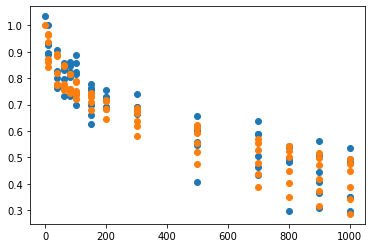

In [19]:
plt.plot(gtab.bvals, sim, 'o')
plt.plot(gtab.bvals, itf.predict(gtab), 'o')


In [20]:
debug

ERROR:root:No traceback has been produced, nothing to debug.


In [21]:
itf.perfusion_fraction, itf.perfusion_fit.md, itf.diffusion_fit.md

(0.21137704452694883, 0.05863934508870224, 0.0006831132791016984)

In [22]:
itf.perfusion_fit.evals, itf.diffusion_fit.evals

(array([3.85359191e-02, 1.37382116e-01, 6.55724436e-15]),
 array([0.00102322, 0.00056232, 0.0004638 ]))

In [23]:
import nibabel as nib

In [24]:
img = nib.load('./data/DWI_IVIM6.nii')

In [25]:
data = img.get_fdata()

In [26]:
idx = (40, 30)

In [27]:
signal = data[:, :, 10, :][idx]

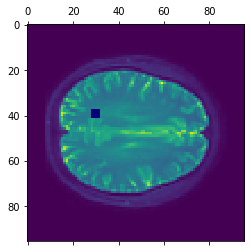

In [28]:
fig, ax = plt.subplots()
ax.matshow(data[:, :, 10, -1])
ROI = np.ones(data[:, :, 10, -1].shape) * np.nan
ROI[idx[0]-2:idx[0]+2, idx[1]-2:idx[1]+2] = 1
ax.matshow(ROI, cmap='jet')


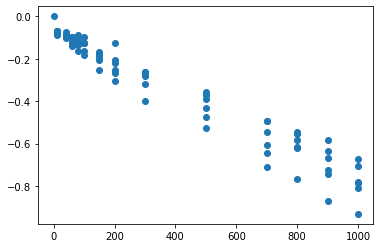

In [29]:
plt.plot(gtab.bvals, np.log(signal/signal[-1]), 'o')

In [30]:
itf = itm.fit(signal)

In [31]:
debug

ERROR:root:No traceback has been produced, nothing to debug.


In [32]:
itm.diffusion_fit.md, itm.perfusion_fit.md

(0.0007332750506892131, 0.0008940471412121619)

In [33]:
itf.diffusion_fit.md, itf.perfusion_fit.md

(0.0007180070972263069, 0.1999999969330102)

In [34]:
itf.perfusion_fraction

0.07182539091746767

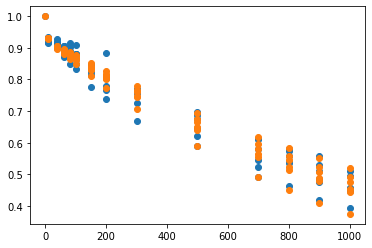

In [35]:
plt.plot(gtab.bvals, signal/signal[-1], 'o')
plt.plot(gtab.bvals, itf.predict(gtab), 'o')


In [36]:
itf.perfusion_fraction

0.07182539091746767

In [37]:
itf.perfusion_fit.fa

2.634377901216932e-08

In [38]:
itf.diffusion_fit.evals, itf.perfusion_fit.evals

(array([0.00092867, 0.00065089, 0.00057446]),
 array([0.19999999, 0.2       , 0.2       ]))

In [39]:
itf.diffusion_fit.fa

0.25396393519181615

In [40]:
np.dot(itf.perfusion_fit.evecs[0], itf.perfusion_fit.evecs[1])

-2.0061911220833163e-18

In [41]:
from dipy.reconst.ivim import IvimModel

In [42]:
mm = IvimModel(gtab)

/srv/conda/envs/notebook/lib/python3.7/site-packages/dipy/reconst/ivim.py:151: UserWarning: Bounds for this fit have been set from experiments and literature survey. To change the bounds, please input your bounds in model definition...
  warnings.warn(bounds_warning, UserWarning)


In [43]:
ff = mm.fit(signal)

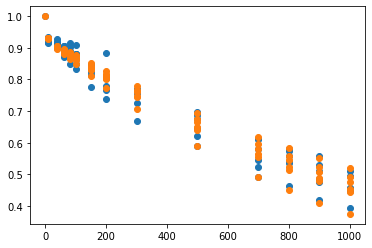

In [44]:
plt.plot(gtab.bvals, signal/signal[-1], 'o')
plt.plot(gtab.bvals, itf.predict(gtab), 'o')
#plt.plot(gtab.bvals, ff.predict(gtab)/ff.predict(gtab)[gtab.b0s_mask] , 'o')


In [45]:
ff.perfusion_fraction

array(0.04738718)

In [46]:
from dipy.core.geometry import sphere2cart, cart2sphere, euler_matrix

In [47]:
sphere2cart(1, np.pi, 0)

(array(1.2246468e-16), array(0.), array(-1.))

In [48]:
R = euler_matrix(0, 0, 0)

In [49]:
R[:3, :3] @ np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [50]:
from dipy.core.geometry import decompose_matrix, vec2vec_rotmat, rodrigues_axis_rotation

In [51]:
decompose_matrix(np.eye(4))

(array([1., 1., 1.]),
 [0.0, 0.0, 0.0],
 [0.0, -0.0, 0.0],
 array([0., 0., 0.]),
 array([0., 0., 0., 1.]))

In [52]:
vec2vec_rotmat(np.array([1, 0, 0]), np.array([0, 1, 0]))

array([[ 0., -1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [53]:
itm.diffusion_fit.evecs

array([[ 0.01661208, -0.22146692,  0.97502638],
       [-0.9682679 ,  0.23963819,  0.07092822],
       [ 0.24936182,  0.94526501,  0.21045842]])

In [54]:
rot0 = np.eye(4)
rot0[:3, :3] = vec2vec_rotmat(itm.diffusion_fit.evecs[0], np.eye(3)[0])
scale, shear, angles0, translate, perspective = decompose_matrix(rot0)
em = euler_matrix(*angles0)

In [55]:
ang1 = np.arccos(np.dot(itm.diffusion_fit.evecs[1], em[1, :3]) / (np.linalg.norm(itm.diffusion_fit.evecs[1]) * np.linalg.norm(em[1, :3])))

In [56]:
rar = np.eye(4)

In [57]:
rar[:3, :3] = rodrigues_axis_rotation(itm.diffusion_fit.evecs[0], np.rad2deg(ang1))

In [58]:
em @ rar

array([[ 0.01661208, -0.22146692,  0.97502638,  0.        ],
       [ 0.98098141, -0.18500189, -0.05873476,  0.        ],
       [ 0.19338953,  0.95745846,  0.21418166,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [59]:
itm.diffusion_fit.evecs

array([[ 0.01661208, -0.22146692,  0.97502638],
       [-0.9682679 ,  0.23963819,  0.07092822],
       [ 0.24936182,  0.94526501,  0.21045842]])

In [60]:
scale, shear, angles, translate, perspective = decompose_matrix(em @ rar)

In [61]:
angles

[1.3507213715178494, -0.19461572431593202, 1.5538637967200888]

In [62]:
euler_matrix(*angles)[:3, :3]

array([[ 0.01661208, -0.22146692,  0.97502638],
       [ 0.98098141, -0.18500189, -0.05873476],
       [ 0.19338953,  0.95745846,  0.21418166]])